# Creating your own dataset from Google Images
Most of the codes here are from FASTAI Lesson 2, please go through [lesson 1](https://course.fast.ai/videos/?lesson=1) and [lesson 2](https://course.fast.ai/videos/?lesson=2) before proceeding. I have left some of the markdown comments from lesson 2.

I am running this in my local machine for easier management of my dataset. So the context here are for local machine.

In [1]:
from platform import python_version

print(python_version())

3.6.8


In [ ]:
#Run this to setup fast ai in google colab

#!curl -s https://course.fast.ai/setup/colab | bash


In [ ]:
#This is for mounting your personal google drive in order to save your notebook and your dataset

# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'fastai-v3/'

In [1]:
from fastai.vision import *

## (Instruction of how to scrap images from google image search from Lesson 2 of FASTAI - watch the video to have a better understanding) 
You can choose your own dataset or follow my format which is the images of 3 dogs breed, only the csv with url are included in github, you have to run this notebook later to download the images.
* Boston Terrier  
* Pug
* French Bulldog

## Get a list of URLs

### Search and scroll

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

## Breaking the limit of 700 images on Google images search
Essentially I followed this [guide](https://medium.com/@intprogrammer/how-to-scrape-google-for-images-to-train-your-machine-learning-classifiers-on-565076972ce). You can read it for more details

As there is a maximum number of images Google Images show which is 700 using the FASTAI example.  
You can increase the number of images by searching in different languages, such as russian, chinese, japanese, etc  
Save them into individual csv after downloading from chrome console after executing javascript code.  
In my case, I have save them as  
*BostonTerrier.csv  
BostonTerrier_cn.csv  
BostonTerrier_jp.csv  
BostonTerrier_ru.csv*  

Combine the different language csv into one combine csv by using the function below. Note: Ensure the path of the saved csv are correct

In [3]:
#Combine the different csv of different languages into one csv. 
import glob
import pandas as pd


def concat_csv(dog_csv):
    extension = 'csv'
    
    #remember to change the directory path(data/dog_breed/{}_csv/*.{}) for your own use.
    all_filenames = [i for i in glob.glob('data/dog_breed/{}_csv/*.{}'.format(dog_csv,extension))] 

    #combine all files in the list
    combined_csv = pd.concat([pd.read_csv(f,header=None) for f in all_filenames ])
    #export to csv
    combined_csv.to_csv( 'data/dog_breed/dog_breed_all/combined_{}.csv'.format(dog_csv), index=False)

In [4]:
concat_csv('BostonTerrier')
concat_csv('Frenchie')
concat_csv('Pug')

In [5]:
folder = 'BostonTerrier'
file = 'combined_BostonTerrier.csv'

In [6]:
path = Path('data/dog_breed/dog_breed_all')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
folder = 'Pug'
file = 'combined_Pug.csv'

In [8]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
folder = 'Frenchie'
file = 'combined_Frenchie.csv'

In [10]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
path.ls()

[WindowsPath('data/dog_breed/dog_breed_all/BostonTerrier'),
 WindowsPath('data/dog_breed/dog_breed_all/combined_BostonTerrier.csv'),
 WindowsPath('data/dog_breed/dog_breed_all/combined_Frenchie.csv'),
 WindowsPath('data/dog_breed/dog_breed_all/combined_Pug.csv'),
 WindowsPath('data/dog_breed/dog_breed_all/Frenchie'),
 WindowsPath('data/dog_breed/dog_breed_all/Pug')]

## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [13]:
classes = ['BostonTerrier','Frenchie','Pug']

In [14]:
folder = 'BostonTerrier'
file = 'combined_BostonTerrier.csv'

dest = path/folder
download_images(path/file, dest, max_pics=3000)

In [15]:
folder = 'Pug'
file = 'combined_Pug.csv'

dest = path/folder
download_images(path/file, dest, max_pics=3000)

In [16]:
folder = 'Frenchie'
file = 'combined_Frenchie.csv'

dest = path/folder
download_images(path/file, dest, max_pics=3000)

In [17]:
# If you have problems download, try with `max_workers=0` to see exceptions:
#download_images(path/file, dest, max_pics=20, max_workers=0)

Then we can remove any images that can't be opened:

In [18]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

BostonTerrier


Frenchie


Pug


## Note: There will be many duplicated images using this method, download [Visipics](http://www.visipics.info/index.php?title=Download) or [Awesome Duplicate Photo Finder](https://www.duplicate-finder.com/photo-download.html) to delete the duplicates.

## View data

In [43]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [44]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [45]:
data.classes

['BostonTerrier', 'Frenchie', 'Pug']

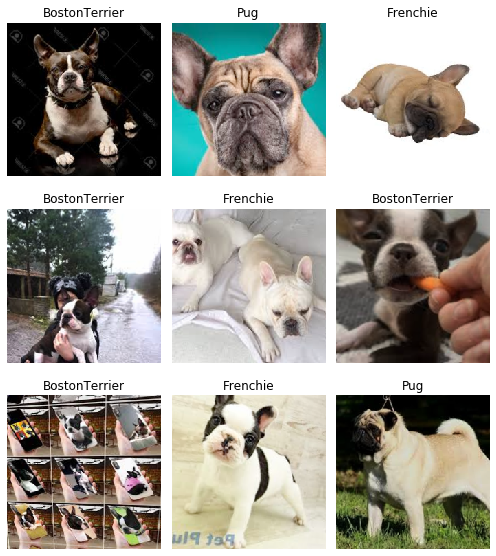

In [47]:
data.show_batch(rows=3, figsize=(7,8))

In [48]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['BostonTerrier', 'Frenchie', 'Pug'], 3, 5160, 1289)

## Train model

In [49]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [50]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.859166,0.500602,0.151280,01:19
1,0.598311,0.413411,0.137316,01:19
2,0.455564,0.363952,0.128782,01:19
3,0.392010,0.337337,0.126455,01:19
4,0.348888,0.338459,0.118697,01:18
5,0.304708,0.329384,0.120248,01:19


In [51]:
learn.save('stage-1')

In [52]:
learn.unfreeze()

In [53]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


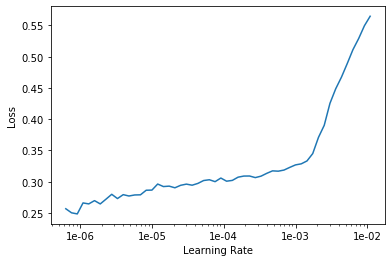

In [54]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

### The error rates are high as there are a lot of unwanted images in this dataset. Those will be clean up later.

In [55]:
learn.fit_one_cycle(3, max_lr=slice(3e-6,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.295124,0.332260,0.122576,01:21
1,0.267875,0.314694,0.108611,01:23
2,0.223433,0.306093,0.107060,01:22


In [56]:
learn.save('stage-2')

## Interpretation

In [57]:
learn.load('stage-2');

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

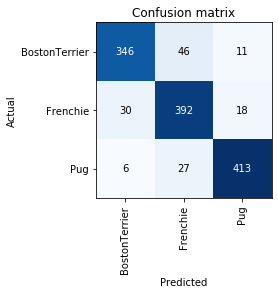

In [59]:
interp.plot_confusion_matrix()

## Cleaning Up (To be thorough, unwanted images can also be deleted quickly from any photo viewer) 

In [60]:
from fastai.widgets import *

In [61]:
#Clean up entire images, therefore no split for this dataset.
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [62]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [63]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [64]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [65]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [66]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [67]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Retrain model with cleaned dataset

In [15]:
db_clean = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                   .split_by_rand_pct(valid_pct=0.2,seed=42)
                   .label_from_df()
                   .transform(get_transforms(), size=224)
                   .databunch()
                   .normalize(imagenet_stats)
     )

learn_cln = cnn_learner(db_clean, models.resnet34, metrics=error_rate)

In [16]:
db_clean

ImageDataBunch;

Train: LabelList (3328 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BostonTerrier,BostonTerrier,BostonTerrier,BostonTerrier,BostonTerrier
Path: data\dog_breed\dog_breed_all;

Valid: LabelList (832 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Pug,Pug,BostonTerrier,Frenchie,Frenchie
Path: data\dog_breed\dog_breed_all;

Test: None

In [17]:
# learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn_cln.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.816190,0.358399,0.081731,02:25
1,0.515623,0.273114,0.067308,02:30
2,0.384670,0.267262,0.070913,02:31
3,0.293980,0.249877,0.072115,02:28
4,0.250656,0.243327,0.072115,02:33
5,0.227066,0.231670,0.068510,02:32


In [18]:
learn_cln.save('stage-1')

In [19]:
learn_cln.unfreeze()

In [20]:
learn_cln.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


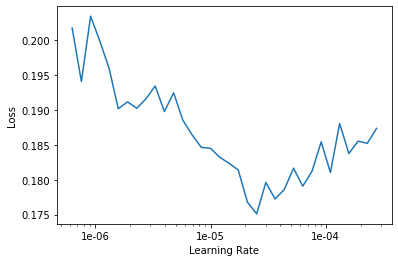

In [21]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn_cln.recorder.plot()

In [25]:
learn_cln.fit_one_cycle(4, max_lr=slice(3e-6,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.109339,0.232639,0.067308,02:32
1,0.109477,0.228198,0.067308,02:32
2,0.098784,0.226720,0.064904,02:32
3,0.085781,0.229433,0.064904,02:32


In [26]:
learn_cln.save('stage-2')

## Interpretation

In [27]:
learn_cln.load('stage-2');

In [28]:
interp_cln = ClassificationInterpretation.from_learner(learn_cln)

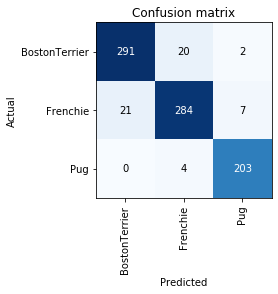

In [29]:
interp_cln.plot_confusion_matrix()

## Putting model in production

In [30]:
# The train model will be exported as export.pkl in the same directory.
learn_cln.export()

In [31]:
#Using CPU for inference as this is a small model.
defaults.device = torch.device('cpu')

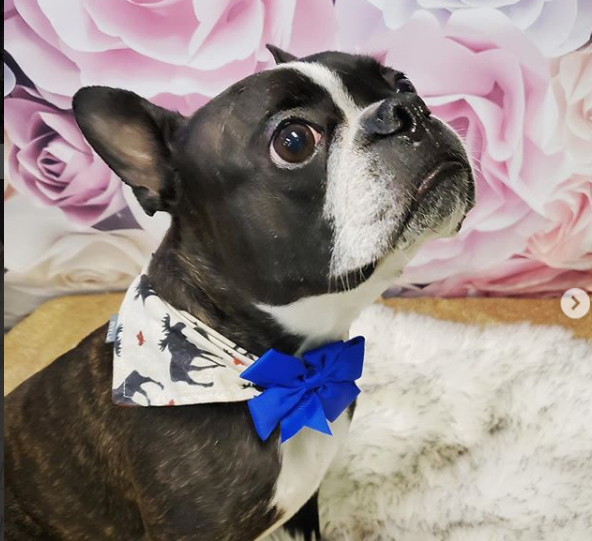

In [33]:
#For inference, I would suggest downloading another images from instagram or facebook and test it here.
#This test image is not included in this repo.
path_dogtest = Path('data/dog_breed/dog_breed_all/data_test_inference')
img = open_image(path_dogtest/'2.png')
img

In [34]:
learn_cln = load_learner(path)

In [35]:
pred_class,pred_idx,outputs = learn_cln.predict(img)
display(pred_class,pred_idx,outputs.max())

Category BostonTerrier

tensor(0)

tensor(0.9936)

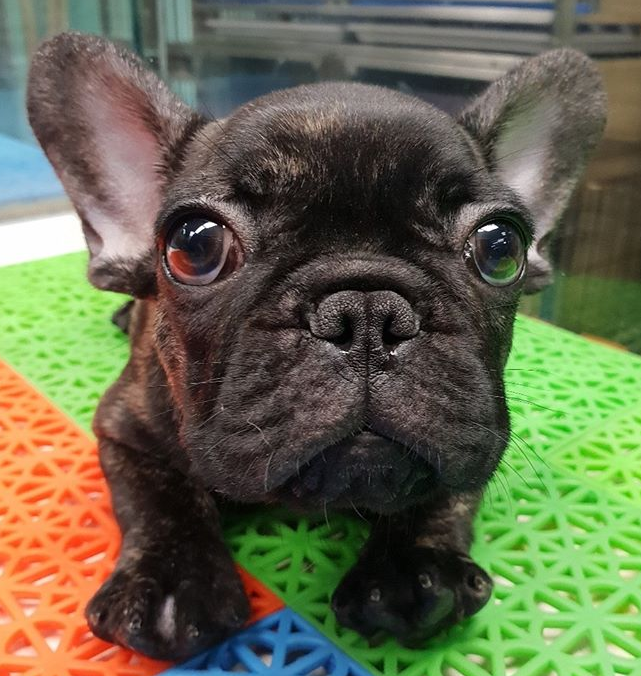

In [36]:
path_dogtest = Path('data/dog_breed/dog_breed_all/data_test_inference')
img = open_image(path_dogtest/'4.png')
img

In [37]:
pred_class,pred_idx,outputs = learn_cln.predict(img)
display(pred_class,pred_idx,outputs.max())

Category Frenchie

tensor(1)

tensor(0.9945)